In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Set up visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv('amazon.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   obje

# Data Cleaning and Preparation

In [2]:
# Clean price columns by removing ₹ and commas, converting to float
price_columns = ['discounted_price', 'actual_price']
for col in price_columns:
    df[col] = df[col].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean discount_percentage by removing % and converting to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Clean rating_count by removing commas and converting to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

# Extract main category from the category column
df['main_category'] = df['category'].str.split('|').str[0]

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create a new column for review sentiment analysis
def analyze_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['review_sentiment'] = df['review_content'].apply(analyze_sentiment)

# Univariate Analysis

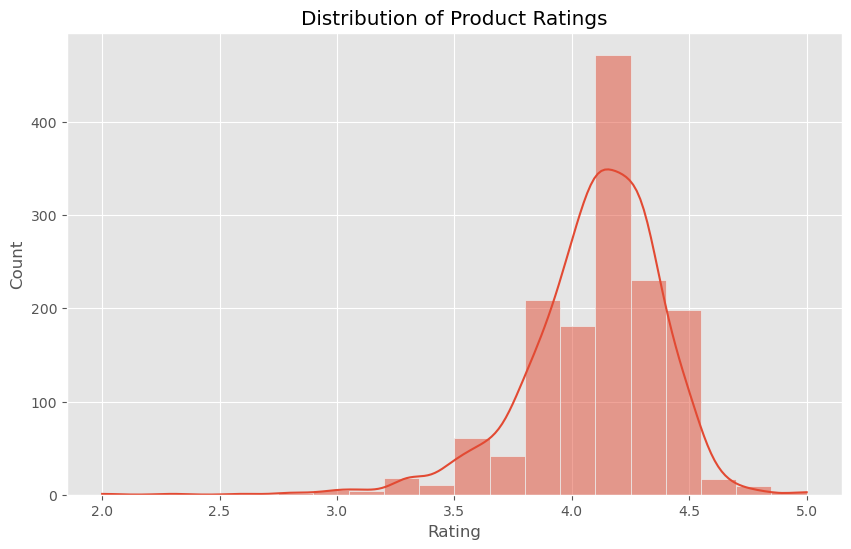

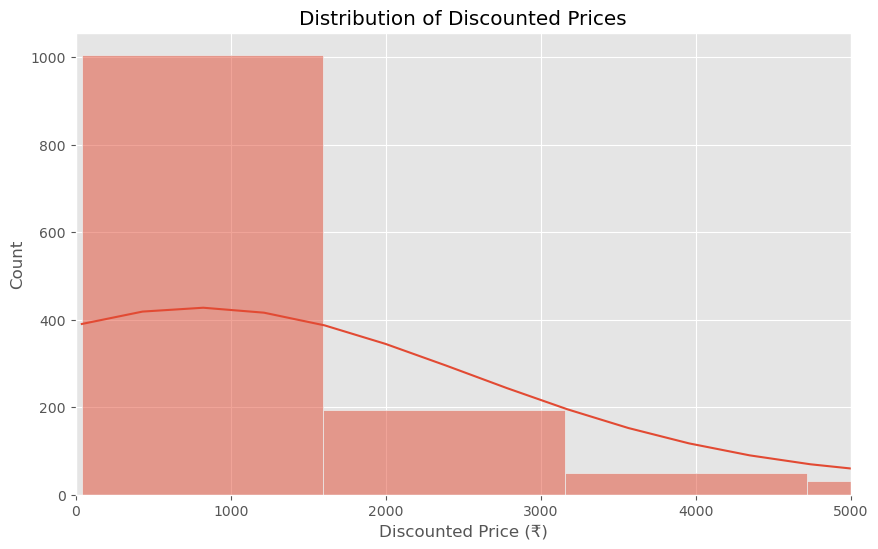

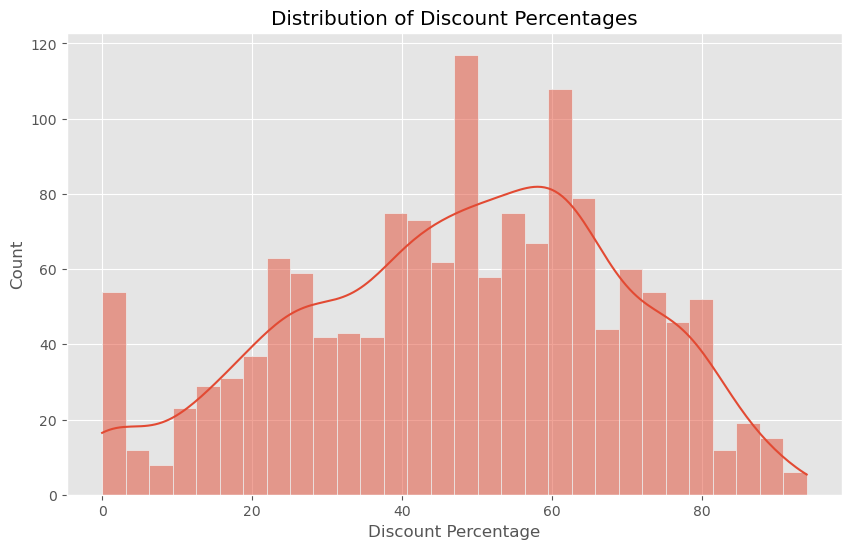

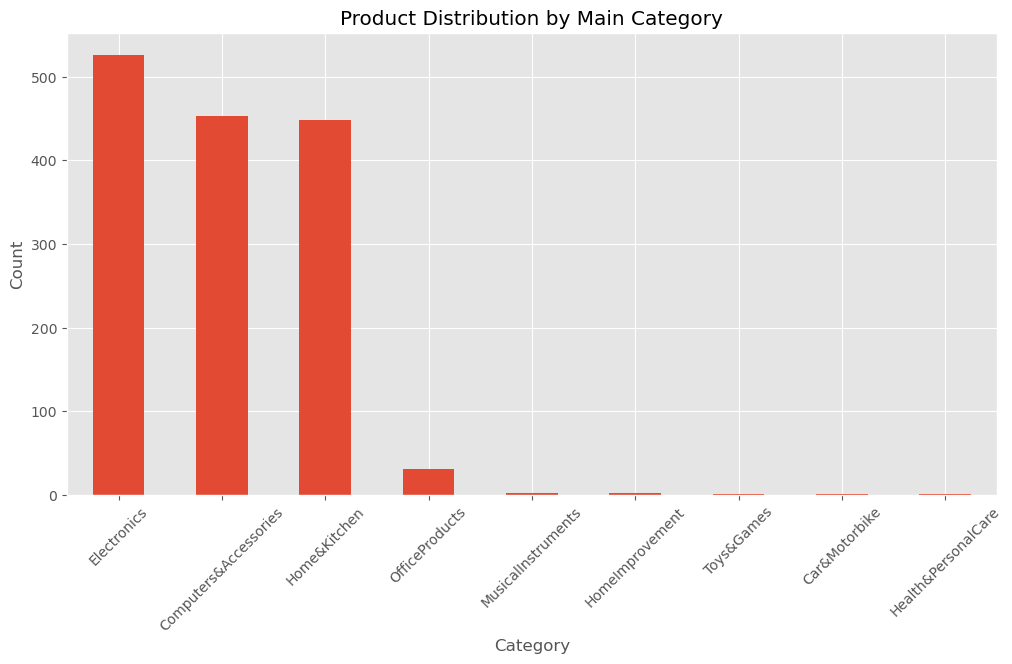

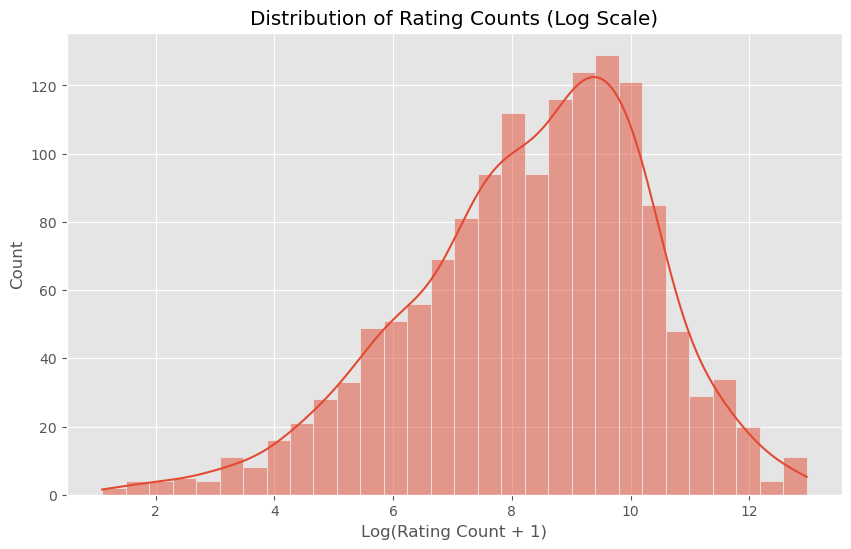

In [3]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot distribution of discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], bins=50, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Count')
plt.xlim(0, 5000)  # Limit x-axis to focus on majority of products
plt.show()

# Plot distribution of discount percentages
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

# Plot top categories
plt.figure(figsize=(12, 6))
df['main_category'].value_counts().plot(kind='bar')
plt.title('Product Distribution by Main Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot rating count distribution (log scale)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['rating_count'].dropna()), bins=30, kde=True)
plt.title('Distribution of Rating Counts (Log Scale)')
plt.xlabel('Log(Rating Count + 1)')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

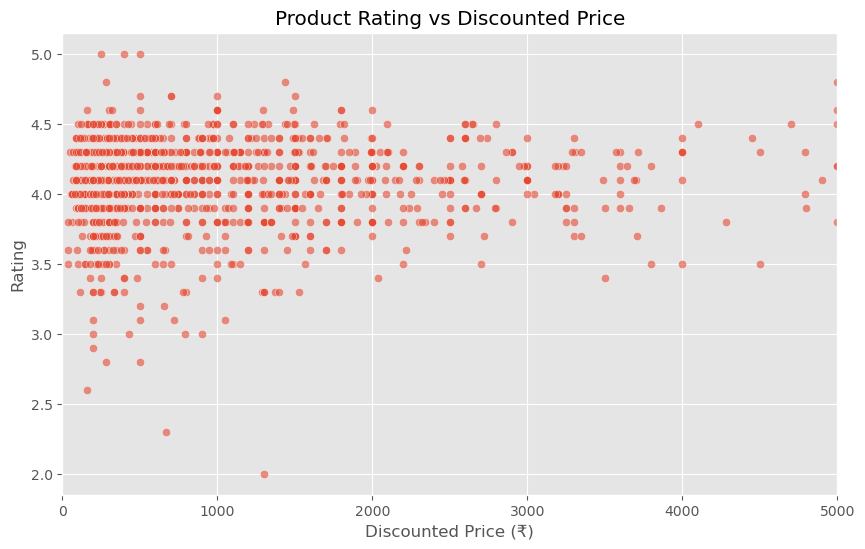

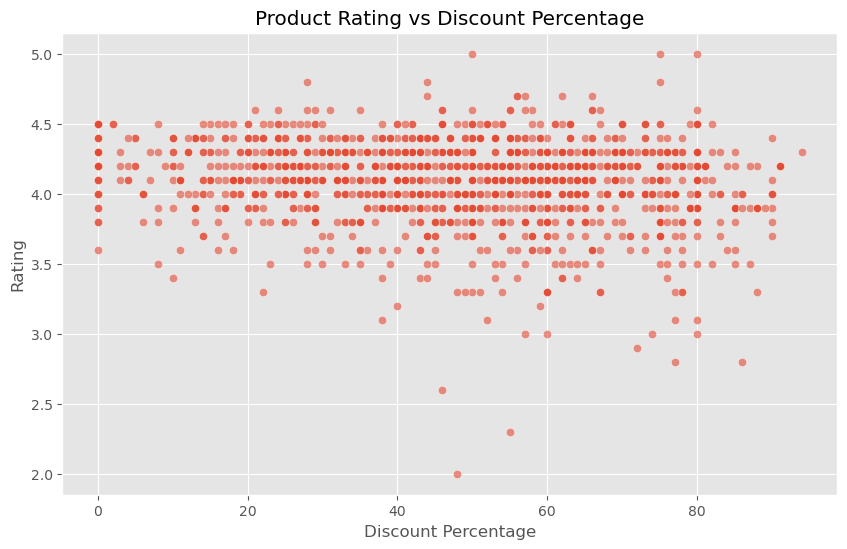

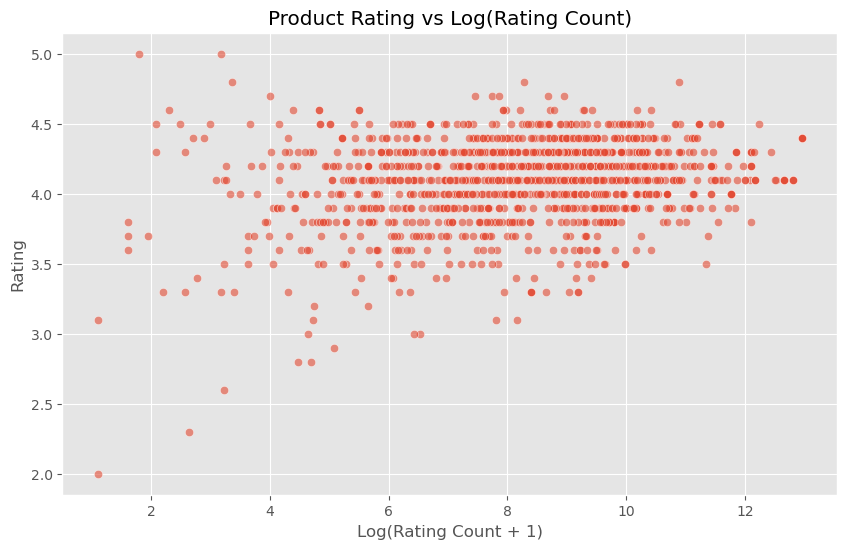

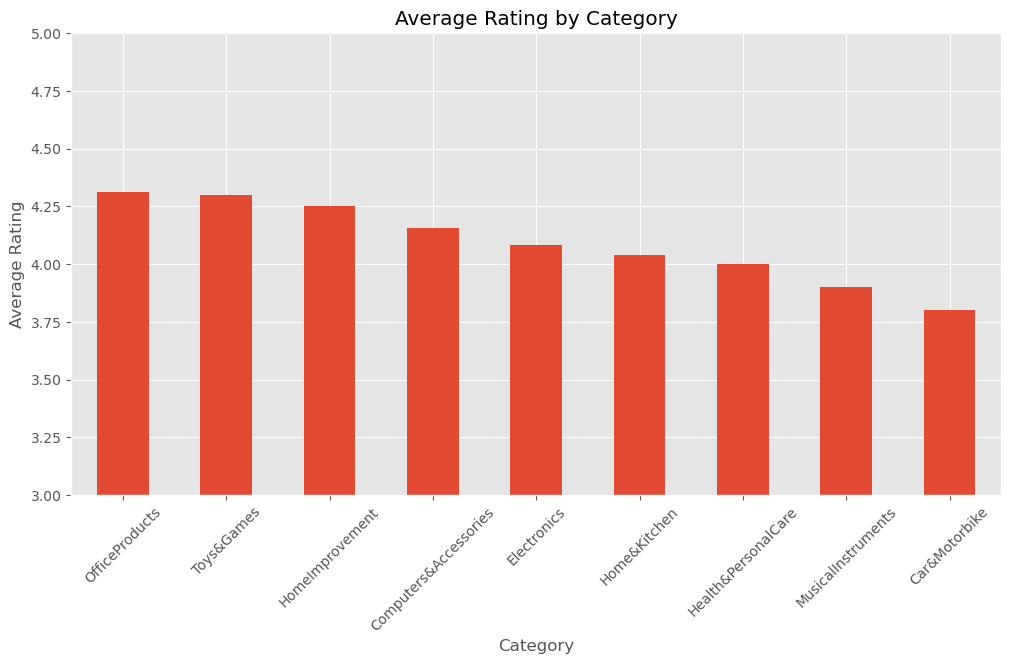

In [4]:
# Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df, alpha=0.6)
plt.title('Product Rating vs Discounted Price')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.xlim(0, 5000)
plt.show()

# Discount percentage vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, alpha=0.6)
plt.title('Product Rating vs Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

# Rating count vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log1p(df['rating_count']), y='rating', data=df, alpha=0.6)
plt.title('Product Rating vs Log(Rating Count)')
plt.xlabel('Log(Rating Count + 1)')
plt.ylabel('Rating')
plt.show()

# Average rating by category
plt.figure(figsize=(12, 6))
df.groupby('main_category')['rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(3, 5)
plt.show()

# Text Analysis

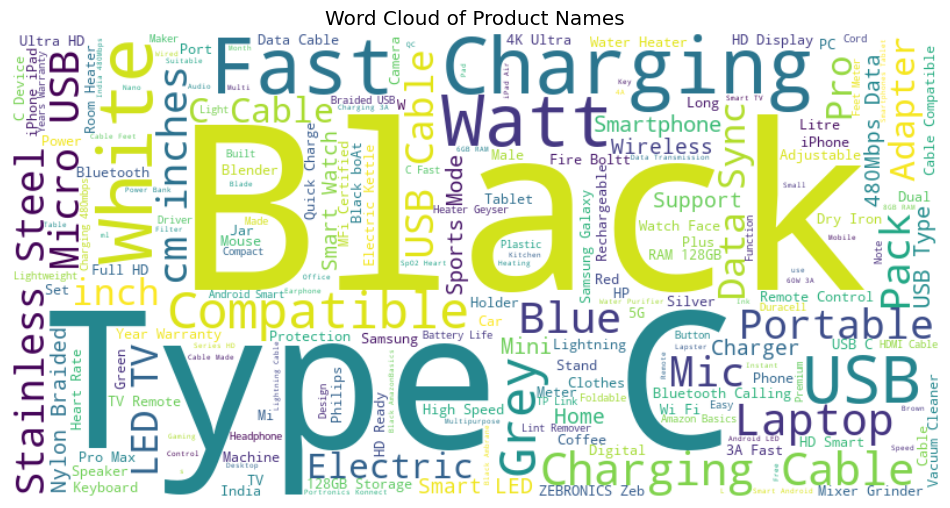

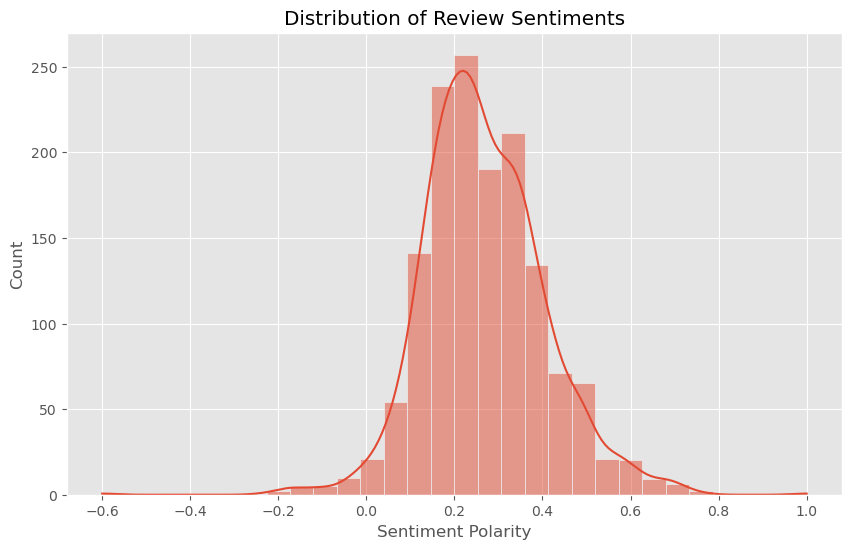

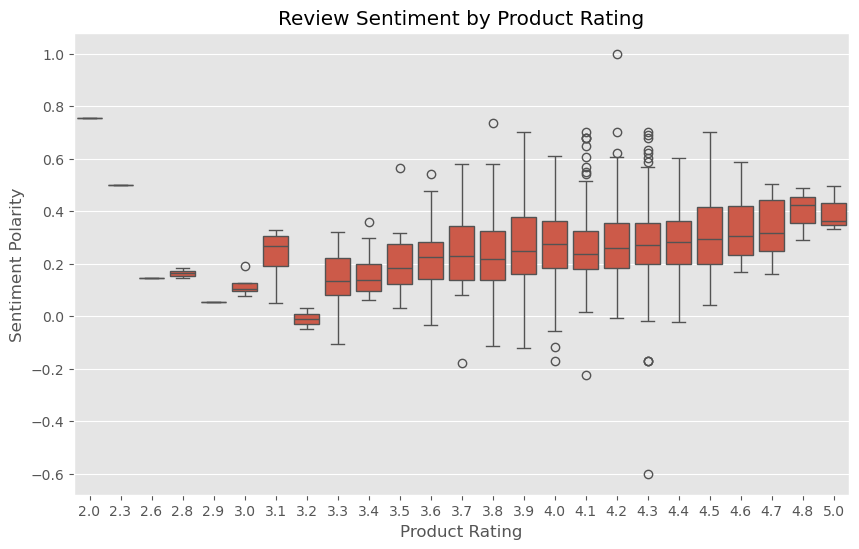

In [5]:
# Word cloud for product names
all_product_names = ' '.join(df['product_name'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_product_names)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Names')
plt.show()

# Sentiment analysis of reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['review_sentiment'], bins=30, kde=True)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

# Sentiment vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_sentiment', data=df)
plt.title('Review Sentiment by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

# Price Analysis

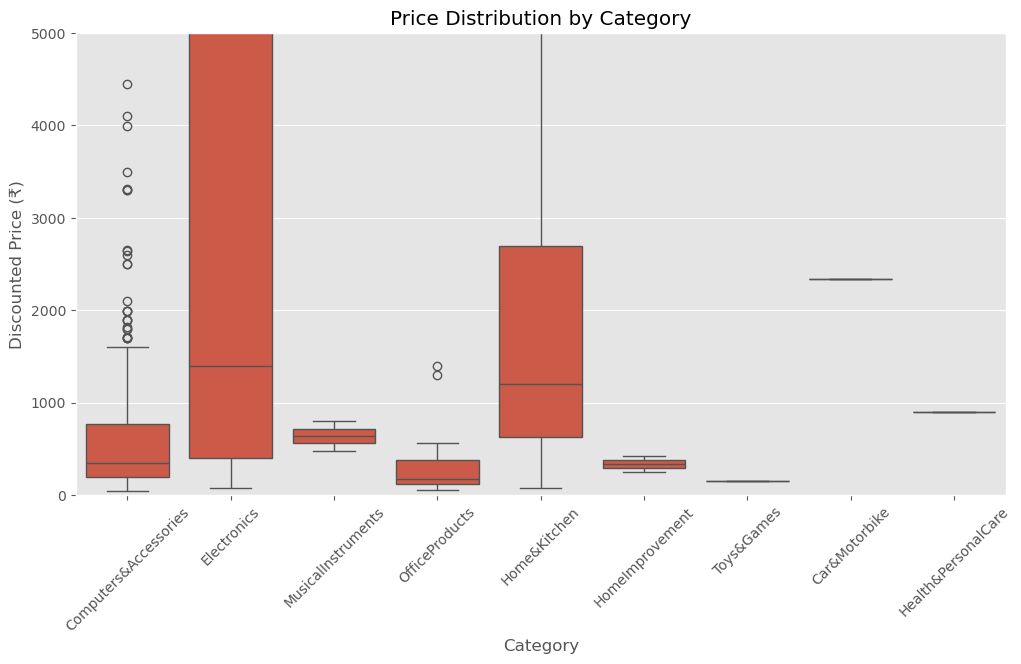

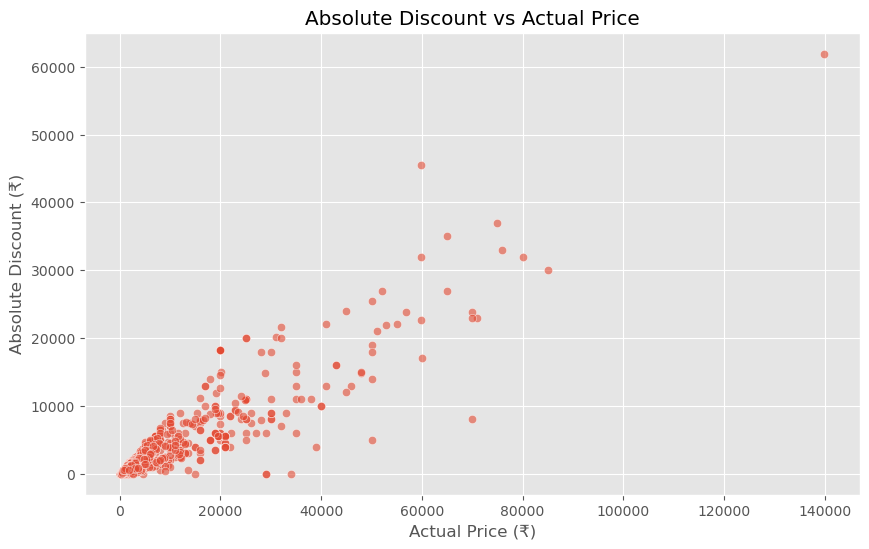


Top 10 products by absolute discount:
                                           product_name  actual_price  \
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...      139900.0   
1182  Coway Professional Air Purifier for Home, Long...       59900.0   
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...       74999.0   
150   VU 138 cm (55 inches) Premium Series 4K Ultra ...       65000.0   
1354  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...       75990.0   
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...       79990.0   
1306  ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleane...       59900.0   
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...       85000.0   
108   VU 139 cm (55 inches) The GloLED Series 4K Sma...       65000.0   
323   TCL 108 cm (43 inches) 4K Ultra HD Certified A...       51990.0   

      discounted_price  absolute_discount  
249            77990.0            61910.0  
1182           14400.0            45500.0  
568            37990.0   

In [6]:
# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='discounted_price', data=df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Discounted Price (₹)')
plt.xticks(rotation=45)
plt.ylim(0, 5000)
plt.show()

# Discount analysis
df['absolute_discount'] = df['actual_price'] - df['discounted_price']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='absolute_discount', data=df, alpha=0.6)
plt.title('Absolute Discount vs Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Absolute Discount (₹)')
plt.show()

# Top products by discount
top_discounts = df.nlargest(10, 'absolute_discount')[['product_name', 'actual_price', 'discounted_price', 'absolute_discount']]
print("\nTop 10 products by absolute discount:")
print(top_discounts)

# Correlation Analysis

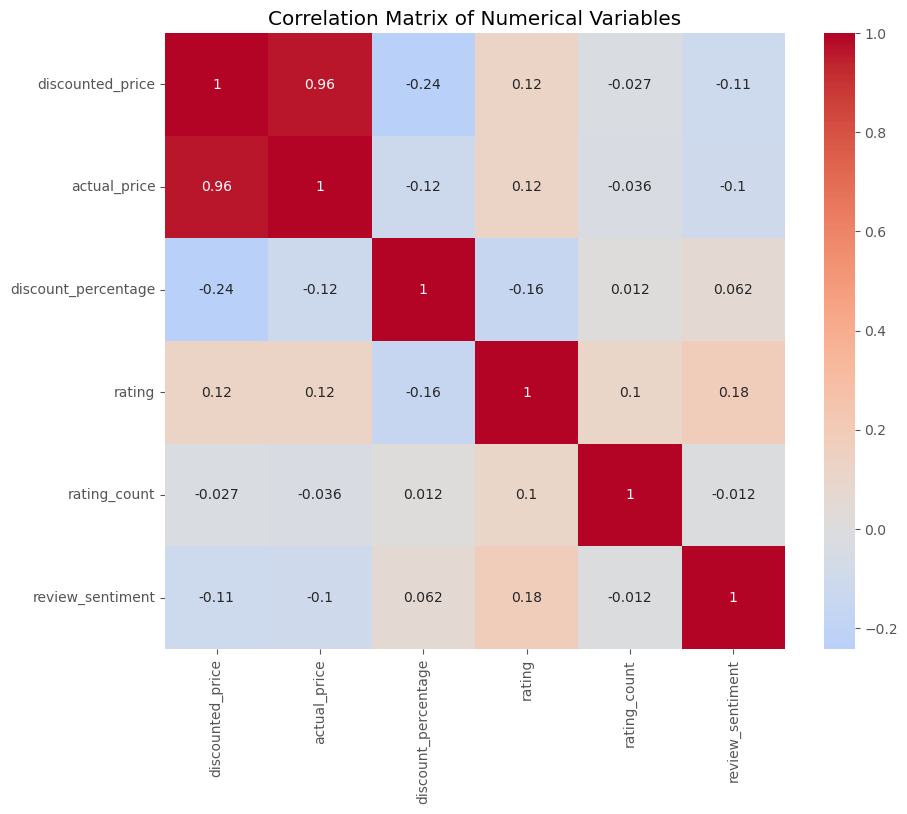

In [7]:
# Select numerical columns for correlation
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'review_sentiment']
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Saving Processed Data

In [8]:
# Save the cleaned dataframe for further analysis
df.to_csv('amazon_cleaned.csv', index=False)